In [168]:
import pandas as pd
import seaborn as sns

In [169]:
df=pd.read_csv("gold_price_usd.csv")

In [170]:
df.head()

,Date,USD (AM)
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4718 non-null   object 
 1   USD (AM)  4718 non-null   float64
dtypes: float64(1), object(1)
memory usage: 73.8+ KB


In [172]:
df.columns

Index(['Date', 'USD (AM)'], dtype='object')

In [173]:
df.rename(columns={"USD (AM)" : "Price"},inplace=True)
df.head()

,Date,Price
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60


In [174]:
df.isnull().sum()

Date     0
Price    0
dtype: int64

In [175]:
df.describe()

,Price
count,4718.000000
mean,959.990812
std,449.456217
min,256.700000
25%,449.112500
50%,1113.125000
75%,1293.750000
max,1896.500000


In [176]:
df['Date']=pd.to_datetime(df['Date'])

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4718 non-null   datetime64[ns]
 1   Price   4718 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 73.8 KB


In [178]:
df['Year']=pd.DatetimeIndex(df['Date']).year
df.head()

,Date,Price,Year
0,2001-01-02,272.80,2001
1,2001-01-03,269.00,2001
2,2001-01-04,268.75,2001
3,2001-01-05,268.00,2001
4,2001-01-08,268.60,2001


In [179]:
df['Month']=pd.DatetimeIndex(df['Date']).month
df.head()

,Date,Price,Year,Month
0,2001-01-02,272.80,2001,1
1,2001-01-03,269.00,2001,1
2,2001-01-04,268.75,2001,1
3,2001-01-05,268.00,2001,1
4,2001-01-08,268.60,2001,1


In [180]:
df['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [181]:
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

<Axes: xlabel='Year', ylabel='Price'>

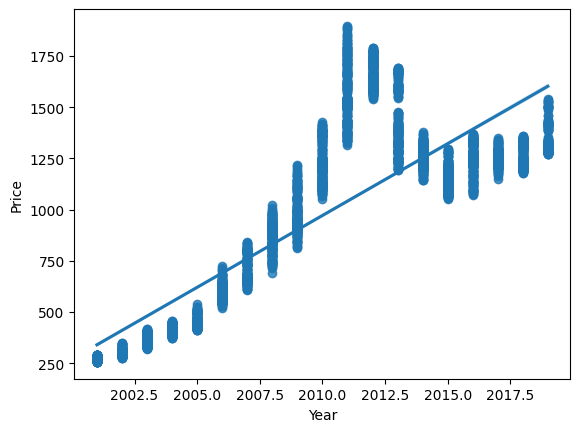

In [182]:
sns.regplot(x=df['Year'],y=df['Price'])

In [183]:
x=df[['Year']]
y=df['Price']

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [186]:
from sklearn.linear_model import LinearRegression

In [187]:
lr=LinearRegression()

In [188]:
lr.fit(x_train,y_train)

LinearRegression()

In [189]:
prediction=lr.predict(x_test)

In [190]:
print(lr.score(x_train,y_train))

0.708551315782231


In [191]:
lr.coef_

array([70.01948266])

In [192]:
lr.intercept_

-139767.70206706575

<Axes: xlabel='Price'>

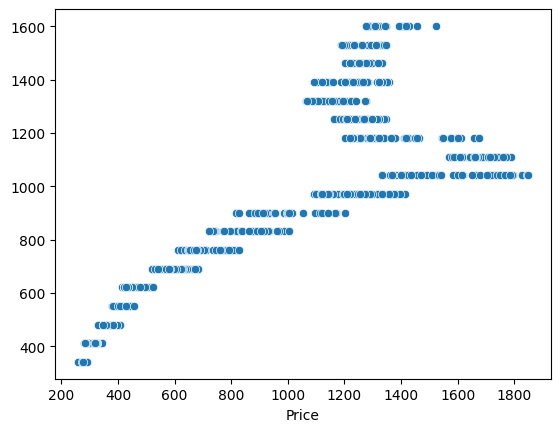

In [193]:
sns.scatterplot(x=y_test,y=prediction)

In [194]:
test=pd.DataFrame(y_test)
test=test.join(x_test)
test['prediction']=prediction
test.set_index('Year')

,Price,prediction
Year,,
2004,425.50,551.341192
2002,307.80,411.302226
2013,1335.75,1181.516536
2007,687.25,761.399640
2009,924.75,901.438605
...,...,...
2019,1306.60,1601.633432
2019,1275.25,1601.633432
2011,1369.25,1041.477570


In [195]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [196]:
mean_squared_error(y_test,prediction)

60025.982330221625

In [197]:
mean_absolute_error(y_test,prediction)

187.58323879064687

In [198]:
value=lr.predict([[2025],
           [2026],
           [2027],
           [2028],
           [2030]])
pd.DataFrame(value,columns=['price'],index=[2025,2026,2027,2028,2030])

c:\Users\HELLO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,price
2025,2021.750328
2026,2091.769810
2027,2161.789293
2028,2231.808776
2030,2371.847741
